# <center>Тема 1.6
## <center>Аналіз набору даних "Титанік"

<center><img src="https://img.tsn.ua/cached/1533906455/tsn-e3716eb1c55ff650a9da4a193f7b6ebf/thumbs/1340x530/5e/37/0c724f079969bf73304c70510837375e.jpeg" width="40%">

### <center>Швидкий погляд на дані

Завантажимо набір даних з інформацією про пасажирів "Титаніка".

- Посилання: https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #розширення функціоналу matplotlib
import numpy as np
sns.set_style("ticks")

titanic_full_df = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv", sep=",")

Визначимо розмірність таблиці.

In [2]:
titanic_full_df.shape

(891, 12)

І переглянемо інформацію.

In [105]:
titanic_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId - ідентифікатор пасажира
     - Survival - поле в якому зазначено врятувалась людина (1) чи ні (0)
- Pclass - містить соціально-економічний статус:
     - високий
     - середній
     - низький
- Name - ім'я пасажира
- Sex - стать пасажира
- Age - вік
- SibSp - містить інформацію про кількість родичів 2-го порядку (чоловік, дружина, брати, сетри)
- Parch - містить інформацію про кількість родичів на борту 1-го порядку (мати, батько, діти)
- Ticket - номер квитка
- Fare - ціна квитка
- Cabin - каюта
- Embarked - порт посадки
     - C - Cherbourg
     - Q - Queenstown
     - S - Southampton

Переглянемо статистичні характеристики набору даних:

In [106]:
titanic_full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


А також перші записи в таблиці.

In [107]:
titanic_full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


І останні записи в таблиці.

In [108]:
titanic_full_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Переглянемо список пасажирів, які вижили.

In [109]:
titanic_full_df[titanic_full_df['Survived']==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Підрахуємо кількість пасажирів, які вижили та загинули.

In [110]:
titanic_full_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Переглянемо декілька довільних записів.

In [111]:
titanic_full_df.loc[442 : 450 : 2, ["Age", "Sex"]]

,Age,Sex
442,25.0,male
444,NaN,male
446,13.0,female
448,5.0,female
450,36.0,male


Виведемо список унікальних значень в стовпці "Embarked"

In [112]:
titanic_full_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

А також неунікальних:

In [113]:
titanic_full_df["Embarked"].nunique()

3

### <center>Попередня обробка даних

Додамо ще один стовпець, який назвемо "Relatives" - родичі. Нехай він буде містити загальну кількість родичів пасажира.

In [114]:
titanic_full_df["Relatives"] = titanic_full_df["SibSp"] + titanic_full_df["Parch"]

Переглянемо результат:

In [115]:
titanic_full_df[["SibSp", "Parch", "Relatives"]].head()

,SibSp,Parch,Relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


Замінимо числові значення в стовпці "Pclass" на рядкові.

In [116]:
titanic_full_df["Pclass"].replace({1: "Мажори", 2: "Середній клас", 3: "Роботяги"}, inplace=True)
titanic_full_df["Pclass"].value_counts()

Роботяги         491
Мажори           216
Середній клас    184
Name: Pclass, dtype: int64

Відсортуємо записи за вартістю квитка.

In [117]:
titanic_full_df.sort_values(by="Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
258,259,1,Мажори,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
737,738,1,Мажори,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0
679,680,1,Мажори,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
88,89,1,Мажори,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5
27,28,0,Мажори,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,Мажори,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,0
413,414,0,Середній клас,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
822,823,0,Мажори,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,0
732,733,0,Середній клас,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,0


Визначимо кількість пропущених даних.

In [118]:
titanic_full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relatives        0
dtype: int64

Видалимо пропущені записи із колонок *Age* та *Embarked*

In [119]:
titanic_full_df = titanic_full_df.dropna(subset=["Age", "Embarked"])

Тепер перевіримо наявність пропусків.

In [120]:
titanic_full_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Relatives      False
dtype: bool

Заповнимо пропущені дані.

In [121]:
titanic_full_df = titanic_full_df.fillna("Невідомо")
titanic_full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,Роботяги,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Невідомо,S,1
1,2,1,Мажори,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,Роботяги,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Невідомо,S,0
3,4,1,Мажори,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,Роботяги,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Невідомо,S,0


### <center>Аналіз даних

Визначимо середній вік пасажирів

In [122]:
titanic_full_df["Age"].mean()

29.64209269662921

Створимо таблицю розподілу за статтю пасажирів, які вижили або загинули.

In [123]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len)

Survived,0,1
Sex,,
female,64,195
male,360,93


А тепер ще і визначимо їх середній вік.

In [125]:
titanic_full_df[["Sex", "Survived", "Age"]].pivot_table(
    values=["Age"], index=["Sex"], columns=["Survived"], aggfunc="mean")

Age           
Survived          0          1
Sex                           
female    25.046875  28.630769
male      31.618056  27.276022

Згрупуємо пасажирів за класом та визначимо середній вік у кожному класі.

In [126]:
titanic_full_df.groupby("Pclass").mean()["Age"]

Pclass
Мажори           38.105543
Роботяги         25.140620
Середній клас    29.877630
Name: Age, dtype: float64

Переглянемо усереднені дані за класом "Роботяги"

In [130]:
titanic_full_df.groupby("Pclass").mean().loc["Роботяги"]

PassengerId    441.219718
Survived         0.239437
Age             25.140620
SibSp            0.585915
Parch            0.456338
Fare            13.229435
Relatives        1.042254
Name: Роботяги, dtype: float64

Побудуємо гістограми для всіх колонок, де це можливо.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Relatives'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

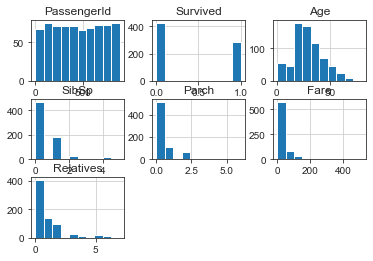

In [133]:
titanic_full_df.hist()

Окрема гістограма розподілу за віком.

<AxesSubplot:>

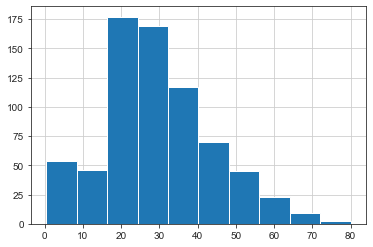

In [134]:
titanic_full_df["Age"].hist()

Кругова діаграма розподілу за статтю:

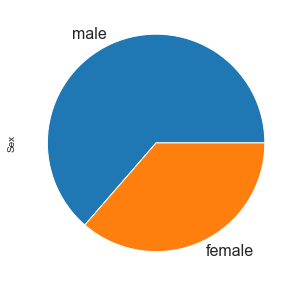

In [137]:
titanic_full_df["Sex"].value_counts().plot(kind="pie", figsize=(5, 5), fontsize=16);

Те саме для класів:

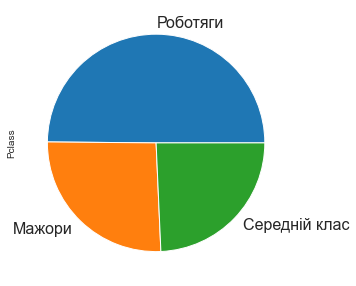

In [139]:
titanic_full_df["Pclass"].value_counts().plot(kind="pie", figsize=(5, 5), fontsize=16);

Стовпчикова діаграма за кількістю виживших та їх статтю:

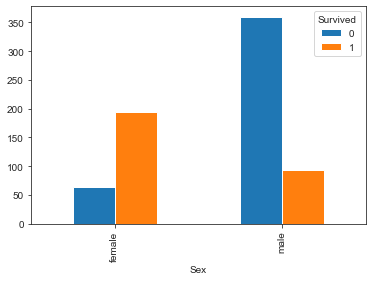

In [140]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len).plot(kind="bar");

Графік летальності за віком та статтю:

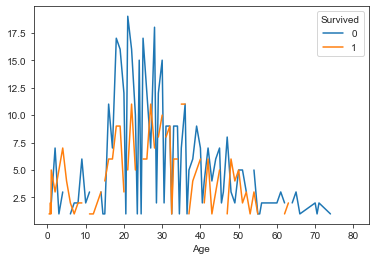

In [149]:
titanic_full_df[["Age", "Survived"]].pivot_table(index=["Age"], columns=["Survived"], aggfunc=len).plot();